In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random;
import tqdm;

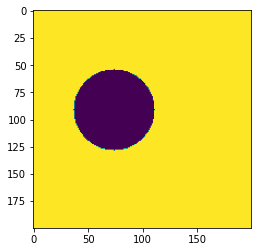

In [ ]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(blank_image);

In [ ]:
def create_training_Data():
  l = 10000;
  X_train = np.zeros(shape=[l,IMAGE_SIZE, IMAGE_SIZE,1]);
  Y_train = np.zeros(shape = [l,3]);
  for i in range(l):
    rad = random.randint(5,50);
    c_x = random.randint(rad,IMAGE_SIZE-rad);
    c_y = random.randint(rad,IMAGE_SIZE-rad);
    Y_train[i,0]= c_x/IMAGE_SIZE;
    Y_train[i,1] = c_y/IMAGE_SIZE;
    Y_train[i,2] = rad/IMAGE_SIZE;
    blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8);
    X_train[i,:,:,0] = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
  return {'X_Train' : X_train, 'Y_Train': Y_train};
  

In [ ]:
training_Data = create_training_Data();

In [ ]:
training_Data

{'X_Train': array([[[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         ...,
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]]],
 
 
        [[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          

array([162., 132.,  35.])

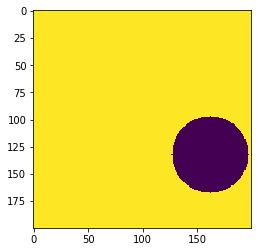

In [ ]:
plt.imshow(training_Data['X_Train'][1999].reshape(200,200))
IMAGE_SIZE*training_Data['Y_Train'][1999]

In [ ]:
import tensorflow;
from tensorflow.keras import layers;
from tensorflow.keras import Model;

In [ ]:
img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))
x = layers.Conv2D(5, 3, activation='relu', strides = 1, padding = 'same')(img_input)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation='relu', strides = 2)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(20, 3, activation='relu', strides = 2)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(3, 5, activation='relu', strides = 2)(x)
output = layers.Flatten()(x)
model = Model(img_input, output)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 5)       50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 5)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 20)        1820      
______________________________________________

In [ ]:
model.compile(loss='mean_squared_error',optimizer= 'adam', metrics=['mse']);

In [ ]:
model.fit(training_Data["X_Train"],training_Data["Y_Train"], epochs = 3,verbose=1)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 114s 11ms/sample - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 2/3
 5344/10000 [===============>..............] - ETA: 53s - loss: 0.1014 - mean_squared_error: 0.1014

In [ ]:
IMAGE_SIZE*model.predict(training_Data['X_Train'][2].reshape(1,IMAGE_SIZE, IMAGE_SIZE,1))

array([[ 89.29135 , 145.24783 ,  45.316525]], dtype=float32)

In [ ]:
IMAGE_SIZE*training_Data['Y_Train'][2]

array([ 96., 152.,  48.])

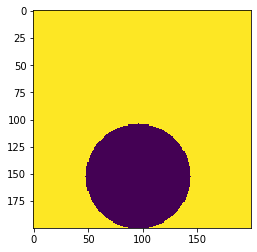

In [ ]:
plt.imshow(training_Data['X_Train'][2].reshape(200,200))

[76, 111, 48]
[[ 70.636116 105.55075   57.324844]]


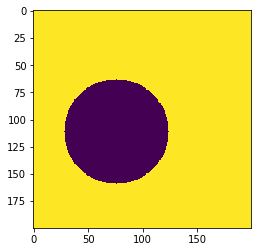

In [ ]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
print([c_x, c_y, rad])
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
new_Image = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(new_Image);
print(IMAGE_SIZE*model.predict(new_Image.reshape(1,IMAGE_SIZE, IMAGE_SIZE,1)))